In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

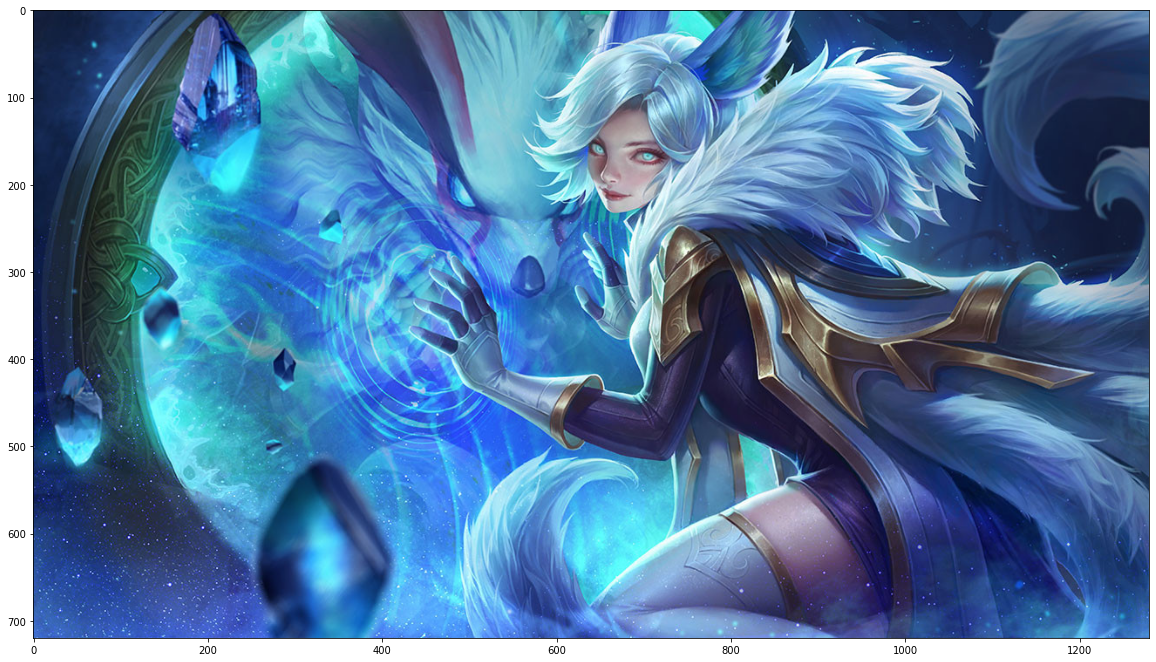

In [ ]:
image_path = 'liliana.jpg'
new_image = imread(image_path)

plt.figure(figsize=(20,20))
plt.imshow(new_image)

In [ ]:
new_image = new_image/255.0
new_image.shape

(720, 1280, 3)

In [ ]:
X = new_image.reshape(-1,3)
X.shape

(921600, 3)

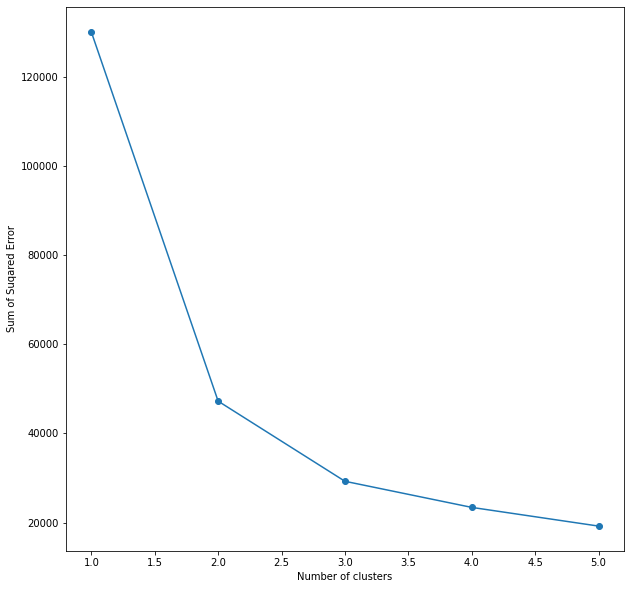

In [ ]:
k_clusters = list(range(1,6))
sse = []

for k in k_clusters:
  km = KMeans(n_clusters=k)
  km.fit(X)
  sse.append(km.inertia_)

plt.figure(figsize=(10,10))
plt.plot(k_clusters, sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Suqared Error')
plt.show()

In [10]:
km_new = KMeans(n_clusters=300)
km_new.fit(X)

img_seg = km_new.cluster_centers_
#print(img_seg)

In [11]:
img_seg = img_seg[km_new.labels_]
img_seg = img_seg.reshape(new_image.shape)

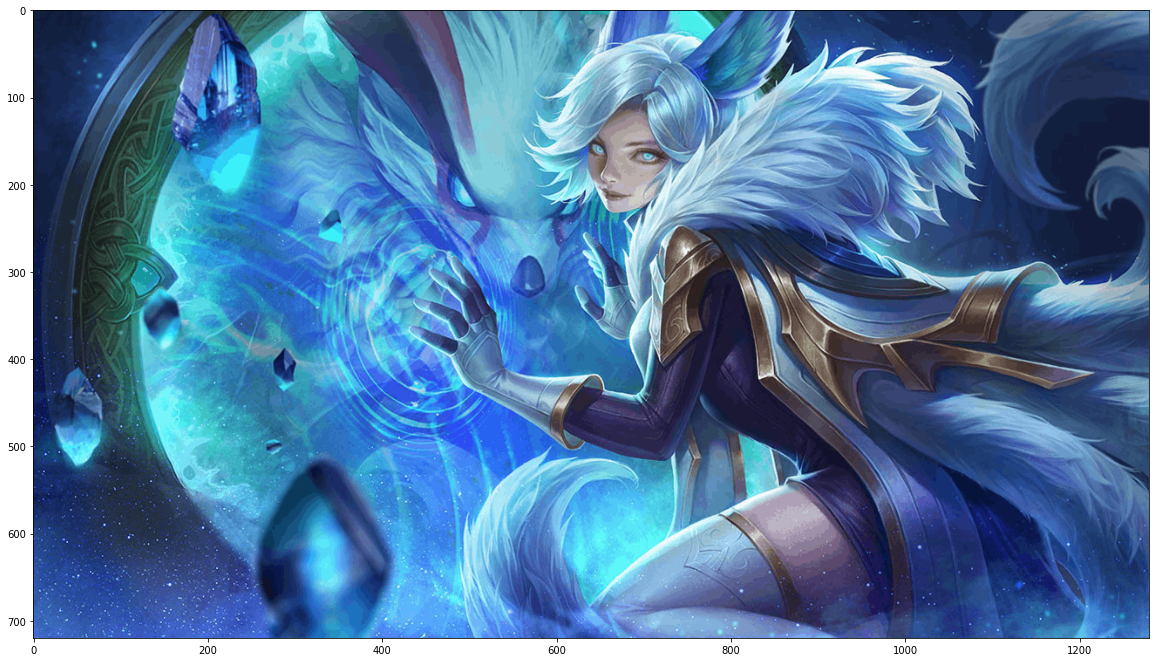

In [12]:
image_after_using_kmeans = "image compression.jpg"
plt.imsave(image_after_using_kmeans, img_seg) #dùng để lưu hình
plt.figure(figsize=(20,20))
plt.imshow(img_seg)

In [13]:
#Xem tỉ lệ giống nhau của hai hình ảnh
from skimage.metrics import structural_similarity

import imutils

import cv2 
from google.colab.patches import cv2_imshow

image1 = cv2.imread(image_path)
image2 = cv2.imread(image_after_using_kmeans)
final_frame = cv2.hconcat((image1,image2))
cv2_imshow(final_frame)

(score, diff) = structural_similarity(image1,image2,full = True,multichannel = True)
print("Structural Similarity Index: {} ".format(score*100)+str('%'))

Output hidden; open in https://colab.research.google.com to view.